# Permutation importance and XPER for blackbox model

## Imports

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.inspection import permutation_importance
import joblib

## Load data from ../Dataset

In [15]:
df = pd.read_csv('../Dataset/df_processed.csv')

In [16]:
df.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,School_Bus,WklyStudyHours,Grade
0,female,group C,bachelor's degree,standard,0,married,regularly,1,3,1,Less than 5 hours,0
1,female,group C,some college,standard,0,married,sometimes,1,0,1,Between 5-10 hours,1
2,female,group B,master's degree,standard,0,single,sometimes,1,4,1,Less than 5 hours,1
3,male,group A,associate's degree,free/reduced,0,married,never,0,1,1,Between 5-10 hours,0
4,male,group C,some college,standard,0,married,sometimes,1,0,1,Between 5-10 hours,1


## Split data

In [17]:
# Create label and features
X = df.drop('Grade', axis=1)
y = df['Grade']

In [18]:
# Create train, test, and validation data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [19]:
# Apply a numerical mapping for categorical columns
categorical_mapping = {
    'Gender': {'female': 0, 'male': 1},
    'EthnicGroup': {'group A': 0, 'group B': 1, 'group C': 2, 'group D': 3, 'group E': 4},
    'ParentEduc': {'some high school': 0, 'high school': 1, "associate's degree": 2, 'some college': 3, "bachelor's degree": 4, "master's degree": 5},
    'LunchType': {'standard': 0, 'free/reduced': 1},
    'ParentMaritalStatus': {'widowed': 0, 'divorced': 1, 'single': 2, 'married': 3},
    'PracticeSport': {'sometimes': 0, 'regularly': 1, 'never': 2},
    'WklyStudyHours': {'Less than 5 hours': 0, 'Between 5-10 hours': 1, 'More than 10 hours': 2}
}

columns_to_map = list(categorical_mapping.keys())
X_train_whitebox = X_train.copy()
X_test_whitebox = X_test.copy()
X_train_whitebox[columns_to_map] = X_train_whitebox[columns_to_map].replace(categorical_mapping)
X_test_whitebox[columns_to_map] = X_test_whitebox[columns_to_map].replace(categorical_mapping)

## Load whitebox model

In [20]:
# Load the model from the file
model_filename = '..\Models\whitebox_model.pkl'
model = joblib.load(model_filename)

## Permutation importance

In [21]:
# Calculate permutation importances using sklearn's permutation_importance
result = permutation_importance(model, X_test_whitebox, y_test, n_repeats=30, random_state=0)

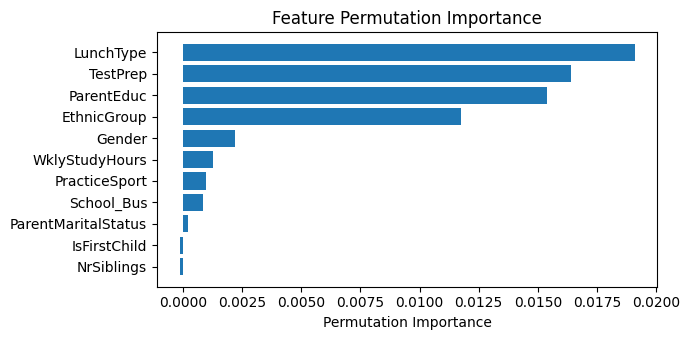

In [22]:
# Plot the feature importances
sorted_idx = result.importances_mean.argsort()
plt.barh(X_test.columns[sorted_idx], result.importances_mean[sorted_idx])
plt.xlabel('Permutation Importance')
plt.title('Feature Permutation Importance')
plt.show()

## XPER

In [ ]:
import XPER
from XPER.compute.Performance import ModelPerformance
from XPER.viz.Visualisation import visualizationClass as viz

In [ ]:
# Define the evaluation metric(s) to be used
XPER = ModelPerformance(X_train_whitebox, y_train, X_test_whitebox, y_test, model, sample_size=200)

# Evaluate the model performance using the specified metric(s)
PM = XPER.evaluate(["AUC"])

# Print the performance metrics
print("Performance Metrics: ", round(PM, 3))

In [ ]:
model.predict_proba(X_test_whitebox)

In [ ]:
XPER_values = XPER.calculate_XPER_values(["AUC"], N_coalition_sampled=1000)

In [ ]:
labels = list(df.drop(columns='Grade').columns)
viz.bar_plot(XPER_values=XPER_values, X_test=pd.DataFrame(X_test), labels=labels, p=11, percentage=True)

For your information, the XPER library cannot run with any model. Here our model is a GAM built with the pyGAM library. The predict_proba method with the model only returns a 1d-array vs a 2d-array for sklearn models. Therefore XPER won't run for our whitebox model.